# Titanic Challenge from Kaggle

### Challenge description

<div style="text-align: justify">The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, **killing 1502 out of 2224 passengers and crew**. This sensational tragedy shocked the international community and led to better safety regulations for ships.</div>

<div style="text-align: justify">One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as *women, children, and the upper-class.*</div>

<div style="text-align: justify">In this challenge, I try to complete the analysis of what sorts of people were likely to survive applying **machine learning** tools to predict which passengers survived the tragedy.</div>

## 1. Exploratory Data Analysis

Importing libraries:

In [1]:
import pandas as pd

from matplotlib import pyplot
import matplotlib.pyplot as plt; plt.style.use('ggplot')

import numpy as np

from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import SelectFromModel

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Reading and exploring data:

In [2]:
train = pd.read_csv("./data/train.csv")

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The **Survived** feature is the target variable. If the passenger survived, then *Survived* = 1. Otherwise, he or she died.

#### Data dictionary:
    - survival     Survival 	            0 = No, 1 = Yes
    - pclass       Ticket class 	        1 = 1st, 2 = 2nd, 3 = 3rd
    - sex          Sex 	
    - Age          Age in years 	
    - sibsp 	   # of siblings / spouses aboard the Titanic 	
    - parch 	   # of parents / children aboard the Titanic 	
    - ticket       Ticket number 	
    - fare         Passenger fare 	
    - cabin        Cabin number 	
    - embarked     Port of Embarkation      C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes:
**pclass**: A proxy for socio-economic status (SES)<br />
1st = Upper<br />
2nd = Middle<br />
3rd = Lower<br />

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way:<br />
*Sibling* = brother, sister, stepbrother, stepsister<br />
*Spouse* = husband, wife (mistresses and fiancés were ignored)<br />

**parch**: The dataset defines family relations in this way:<br />
*Parent* = mother, father<br />
*Child* = daughter, son, stepdaughter, stepson<br />
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

The **Survived** variables shows that 549 passengers of the training set died in the Titanic sinking and 342 could survived. There are 891 passenger in total in the train dataset. Therefore, there are some missing values in the **Age** variable. Let's check it up:

In [8]:
np.isnan(train['Age']).value_counts()

False    714
True     177
Name: Age, dtype: int64

In [9]:
train['Age'].fillna(train['Age'].median(),inplace=True)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's check if some groups of people such as women or children were more likely to survive as the summary of the challenge suggest.

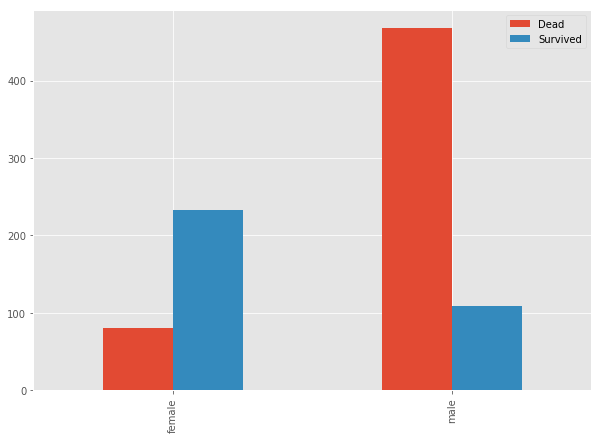

In [10]:
survival_by_gender=pd.DataFrame({'Survived':train[train['Survived']==1]['Sex'].value_counts(),
                                 'Dead':train[train['Survived']==0]['Sex'].value_counts()})
#Plot
survival_by_gender.plot.bar(figsize=(10,7))
plt.show()

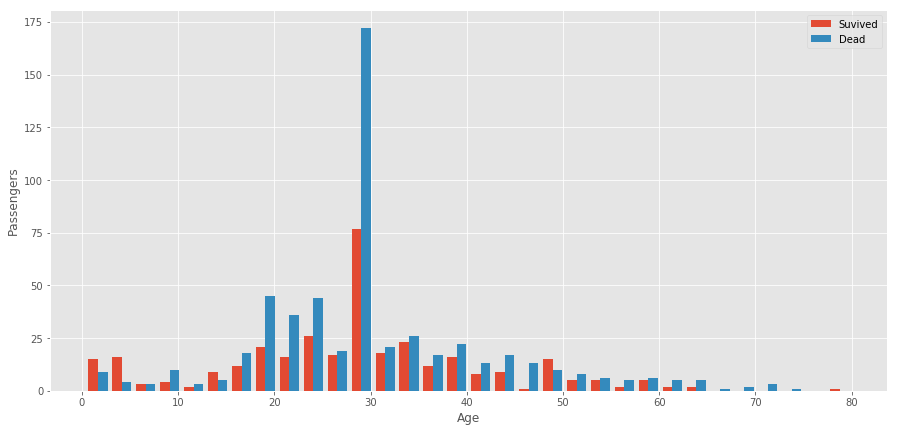

In [11]:
figure=plt.figure(figsize=(15,7))

plt.hist([train[train['Survived']==1]['Age'],train[train['Survived']==0]['Age']],
         bins=32,label=['Suvived','Dead'])
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Let's now focus on the **pclass** feature in order to check if upper-class people were less likely to die than other classes.

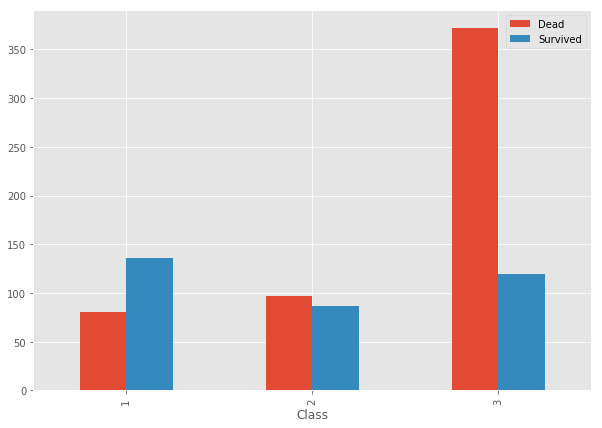

In [12]:
survival_by_class=pd.DataFrame({'Survived':train[train['Survived']==1]['Pclass'].value_counts(),
                                 'Dead':train[train['Survived']==0]['Pclass'].value_counts()})
#Plot
survival_by_class.plot.bar(figsize=(10,7))
plt.xlabel('Class')
plt.show()

Let's now combine the age, the fare of the ticket and the survival as well as if the upper classes paid more money for the ticket than lower classes:

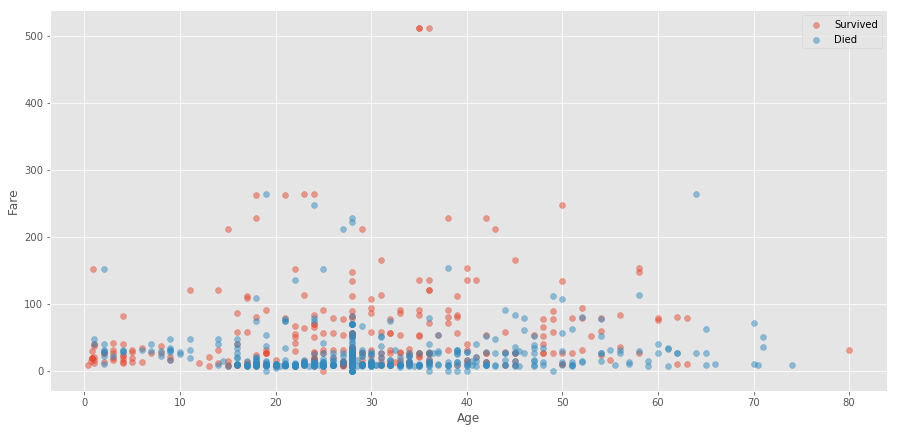

In [13]:
plt.figure(figsize=(15,7))
ax=plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],alpha=0.5) #Survived people
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],alpha=0.5) #Died people
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived','Died'))
plt.show()

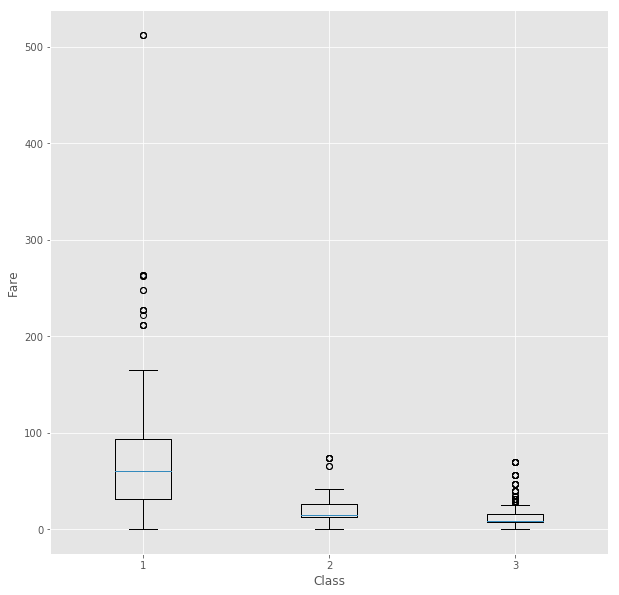

In [14]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
fair_by_class=[[train[train['Pclass']==1]['Fare'].values],
               [train[train['Pclass']==2]['Fare'].values],
               [train[train['Pclass']==3]['Fare'].values]]

ax.boxplot(fair_by_class)
ax.set_xlabel('Class')
ax.set_ylabel('Fare')
plt.show()

Some exploratory data analysis **conclusions**:
* Women and people younger than 5 were more likely to survive.
* Third class people were much more likely to die than other classes.
* It seems that there are a group of people between 15 and 50 who paid less than 50 dollars for the ticket. They tend to die in the sinking.
* Passengers who paid a fare higher than 50 dollars tend to survive.
* People from first class tend to pay more money for the ticket.

## 2. Feature Engineering

In this section, we will focus on processing some features such as names or the tickets in order to easily fed machine learning algorithms and engineering some other features that will be useful to build our model.

#### Combining train and test set

In [15]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

train_without_target=train.loc[:, train.columns != 'Survived']

combined=train_without_target.append(test).reset_index().drop('index',axis=1)

In [16]:
combined.shape

(1309, 11)

#### Extracting passenger titles and processing the name

In [17]:
combined['Titles']=list(map(lambda x:x.split(',')[1].split('.')[0].strip(),combined['Name']))

In [18]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
#NAME
#list_names=list(combined['Name'].apply(lambda x:x.split(' ')))
#pd.DataFrame([name for passenger in list_names for name in passenger])[0].value_counts()

In [20]:
#Encoding Titles
combined=pd.concat([combined,pd.get_dummies(combined['Titles'],prefix='Title')],axis=1)

In [21]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,1,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,1,0,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,1,0,0,0,0,0


#### Processing the ages

In [22]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 30 columns):
PassengerId           1309 non-null int64
Pclass                1309 non-null int64
Name                  1309 non-null object
Sex                   1309 non-null object
Age                   1046 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Ticket                1309 non-null object
Fare                  1308 non-null float64
Cabin                 295 non-null object
Embarked              1307 non-null object
Titles                1309 non-null object
Title_Capt            1309 non-null uint8
Title_Col             1309 non-null uint8
Title_Don             1309 non-null uint8
Title_Dona            1309 non-null uint8
Title_Dr              1309 non-null uint8
Title_Jonkheer        1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Major           1309 non-null uint8
Title_Master          1309 non-null uint8
Ti

In [23]:
#Create groups for filling age:
grouped_combined=combined[['PassengerId','Age','Sex','Pclass','Titles','Embarked']]
grouped_combined=grouped_combined.groupby(['Sex','Pclass','Embarked','Titles']).agg(['count','median'])

#Save median of each group in a dictionary
dictionary=dict(grouped_combined['Age']['median'])

#Apply dictionary to misssing ages
fill_age=combined.apply(lambda x:dictionary[tuple(x[['Sex','Pclass','Embarked','Titles']])] 
                        if np.isnan(x['Age']) else x['Age'],axis=1)

combined['Age']=fill_age

#Missing values that don't belong to any previous group are replaced by median of ages.
combined[np.isnan(combined['Age'])]=combined['Age'].fillna(train['Age'].median(),inplace=True)

#### Processing Fare and Embarked

In [24]:
combined['Fare'].fillna(combined['Fare'].median(),inplace=True)

In [25]:
combined['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
combined['Embarked'].fillna(combined['Embarked'].value_counts().index[0],inplace=True)

In [27]:
#Encoding 'Embarked' variable
combined=pd.concat([combined,pd.get_dummies(combined['Embarked'],prefix='Embarked')],axis=1)

#### Processing Cabin

In [28]:
combined['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [29]:
combined['Cabin'].value_counts().head(10)

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
F4                 4
B96 B98            4
C78                4
C22 C26            4
F2                 4
F33                4
Name: Cabin, dtype: int64

In [30]:
combined['Cabin'].fillna('U',inplace=True) #fill nan values with 'U'
combined['Cabin']=combined['Cabin'].map(lambda x:x[0]) # get the first letter of cabin and replace it for cabin value

In [31]:
combined['Cabin'].value_counts().head(9)

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [32]:
#Encoding Cabin variable
combined=pd.concat([combined,pd.get_dummies(combined['Cabin'],prefix='Cabin')],axis=1)

In [33]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 42 columns):
PassengerId           1309 non-null float64
Pclass                1309 non-null float64
Name                  1309 non-null object
Sex                   1309 non-null object
Age                   1309 non-null float64
SibSp                 1309 non-null float64
Parch                 1309 non-null float64
Ticket                1309 non-null object
Fare                  1309 non-null float64
Cabin                 1309 non-null object
Embarked              1309 non-null object
Titles                1309 non-null object
Title_Capt            1309 non-null float64
Title_Col             1309 non-null float64
Title_Don             1309 non-null float64
Title_Dona            1309 non-null float64
Title_Dr              1309 non-null float64
Title_Jonkheer        1309 non-null float64
Title_Lady            1309 non-null float64
Title_Major           1309 non-null float64
Title_Master       

#### Processing Sex

In [34]:
combined['Sex']=combined['Sex'].map({'male':1,'female':0})

In [35]:
combined['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

#### Processing Sibsp and Parch

In [36]:
combined['FamilySize']=combined['Parch']+combined['SibSp']+1

In [37]:
combined['FamilySize'].value_counts()

1.0     790
2.0     235
3.0     159
4.0      43
6.0      25
5.0      22
7.0      16
11.0     11
8.0       8
Name: FamilySize, dtype: int64

In [38]:
combined['Single']=combined['FamilySize'].map(lambda x:1 if x==1 else 0)
combined['SmallFamlily']=combined['FamilySize'].map(lambda x:1 if x in [2,3,4] else 0)
combined['LargeFamily']=combined['FamilySize'].map(lambda x:1 if x > 4 else 0)

#### Processing Ticket

In [39]:
combined['Ticket'].value_counts().head(10)

CA. 2343        11
1601             8
CA 2144          8
347077           7
347082           7
3101295          7
S.O.C. 14879     7
PC 17608         7
347088           6
382652           6
Name: Ticket, dtype: int64

In [40]:
combined['Ticket'].map(lambda x:len(x)).value_counts()

6     602
5     193
4     148
8     118
10     63
9      37
7      36
13     19
11     18
17     16
12     16
18     14
16     13
15     12
3       4
Name: Ticket, dtype: int64

In [41]:
combined['TicketStr']=combined['Ticket'].map(lambda x:x.replace('.','').replace('/','').split()[0])
combined['TicketStr']=combined['TicketStr'].map(lambda x:'Digit' if x.isdigit() else x)

In [42]:
combined['TicketStr'].value_counts().head(10)

Digit      957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
Name: TicketStr, dtype: int64

In [43]:
#Encodign TicketStr variable
combined=pd.concat([combined,pd.get_dummies(combined['TicketStr'],prefix='TicketStr')],axis=1)

In [44]:
combined['TicketDig']=combined.apply(lambda x:len(x['Ticket']) if x['TicketStr']=='Digit' else 0,axis=1)

In [45]:
combined['TicketDig'].value_counts()

6    596
0    352
5    193
4    144
7     20
3      4
Name: TicketDig, dtype: int64

In [46]:
combined.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Titles','TicketStr'],inplace=True, axis=1)

In [47]:
combined.shape

(1309, 78)

In [48]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Capt,Title_Col,Title_Don,Title_Dona,...,TicketStr_SOTONO2,TicketStr_SOTONOQ,TicketStr_SP,TicketStr_STONO,TicketStr_STONO2,TicketStr_STONOQ,TicketStr_SWPP,TicketStr_WC,TicketStr_WEP,TicketDig
0,3.0,1,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,6
4,3.0,1,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,6


## 3. Model

####  Recovering train and test sets from the combined dataset

In [49]:
#Target variable to predict in the test set
y_train=pd.read_csv('./data/train.csv')['Survived']

#Train set
del train
X_train=combined.iloc[:891]

#Test set
del test
X_test=combined.iloc[891:]

#### Model and feature selection

In [50]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
features=pd.DataFrame({'feature':X_train.columns,
                       'importance':clf.feature_importances_})

In [52]:
features.sort_values(['importance'],inplace=True,ascending=True)
features.set_index('feature',inplace=True)

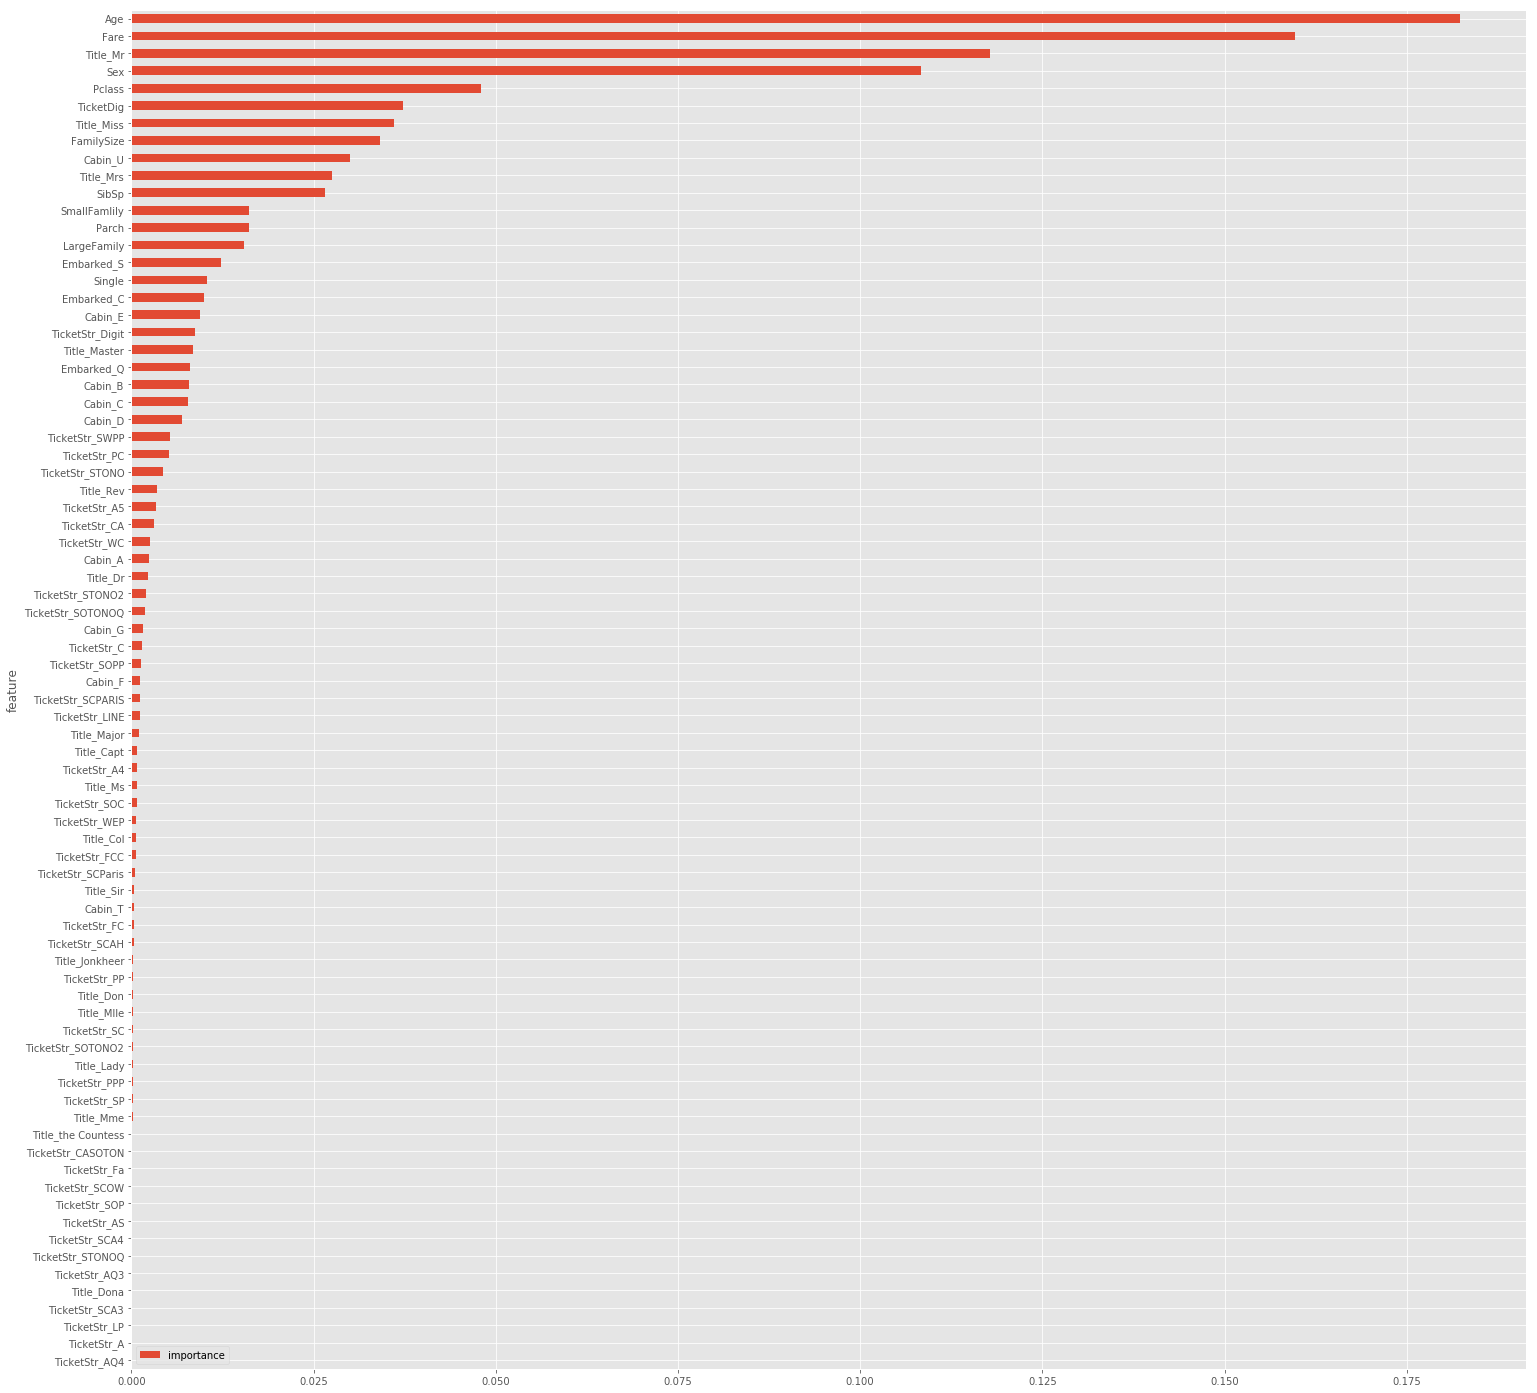

In [53]:
features.plot(kind='barh',figsize=(25,25))
plt.show()

In [57]:
model=SelectFromModel(clf,prefit=True)
train_reduced=model.transform(X_train)
train_reduced.shape

(891, 14)

In [62]:
pd.DataFrame(train_reduced).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,6.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6.0


In [58]:
test_reduced=model.transform(X_test)
test_reduced.shape

(418, 14)

#### Hyperparameters tuning

In [105]:
number_of_features=11
features_to_use=features.sort_values('importance',ascending=False).index[range(number_of_features)]

In [107]:
# turn run_gs True if you want to tune the best hyperparameters
run_gs=True

if run_gs:
    parameter_grid={
        'max_depth':[4,6,8],
        'n_estimators':[10,50,100,200,500],
        'max_features':['sqrt','auto','log2'],
        'min_samples_split':[10,30,50],
        'min_samples_leaf':[1,3,10],
        'bootstrap':[True,False]
    }
    forest=RandomForestClassifier()
    cross_validation=StratifiedKFold(y_train,n_folds=5)
    
    grid_search=GridSearchCV(forest,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=cross_validation)
    
    grid_search.fit(X_train[features_to_use],y_train)
    model=grid_search
    parameters=grid_search.best_params_
    
    print('Best scores: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters={
        'max_depth':6,
        'n_estimators':50,
        'max_features':'log2',
        'min_samples_split':50,
        'min_samples_leaf':1,
        'bootstrap':False
    }
    model=RandomForestClassifier(**parameters)
    model.fit(X_train[features_to_use],y_train)

Best scores: 0.8361391694725028
Best parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


#### Output file for submission

In [108]:
y_test=model.predict(X_test[features_to_use])

In [109]:
output=pd.DataFrame({'PassengerId':pd.read_csv('./data/test.csv')['PassengerId'],
                     'Survived':y_test})
output.to_csv('./models/MyModel_{}_features.csv'.format(number_of_features),index=False)

**Some baselines to keep in mind:**

- Everybody dies:

In [ ]:
baseline=pd.DataFrame({'PassengerId':pd.read_csv('./data/test.csv')['PassengerId'],
                       'Survived':0})
baseline.to_csv('./models/baseline.csv',index=False)

- Every man dies:

In [ ]:
men_die=pd.DataFrame({'PassengerId':pd.read_csv('./data/test.csv')['PassengerId'],
                       'Survived':list(X_test['Sex'].map(lambda x:0 if x==1 else 1))})
men_die.to_csv('./models/men_die.csv',index=False)

- Women and children First!

In [ ]:
women_children=[]
for i in range(X_test.shape[0]):
    i=i+891
    if X_test['Sex'][i]==1 and X_test['Age'][i]>5:
        women_children.append(0)
    else:
        women_children.append(1)

In [ ]:
women_children_first=pd.DataFrame({'PassengerId':pd.read_csv('./data/test.csv')['PassengerId'],
                                   'Survived':women_children})
women_children_first.to_csv('./models/women_children_first.csv',index=False)

## 4. Results

The following accuracies are based on Kaggle submissions:<br />
   >`Baseline Everybody dies: 0.62679`<br />
   >`Every man dies: 0.76555`<br />
   >`Women and children first: 0.76076`<br />
   >`4 most important features: 0.75119`<br />
   >`5 most important features: 0.77033`<br />
   >`11 most important features: 0.77990`<br />
   >`Reduced features: 0.78947`<br />
   >`All features selected: 0.79425`<br />